In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [64]:
#Import the Non-League football CSV file containing teams, their league position, their promotion status and their twitter followers
football = pd.read_csv("football_data_final_edit.csv")
#Drop null rows which erroneously came with the CSV 
football.drop([0,1], inplace=True)
#Drop null columns which erroneously came with the CSV
football.drop(["Unnamed: 25","Unnamed: 26","Unnamed: 27","Unnamed: 28"],inplace=True,axis=1)
#Since we dropped some rows, we need to reset the index of the dataframe
football = football.reset_index(drop=True)
#The column headings came from the CSV as the first row, redefine the headings correctly and strip any whitespace with lambda func
strip_whitespace = lambda x: x.strip() 
column_headings = list(map(strip_whitespace,list(football.iloc[0])))
football.columns = column_headings
#Remove the now un-needed dupiclate row containing the column headings and reset the index again.
football.drop(football[football["Step"]=="0"].index,inplace=True)
football.drop([0],inplace=True)
football = football.reset_index(drop=True)
#Let's trim any whitespace from entries and column headings
football =football.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

football.dropna(subset =["Step","League","Gained between 19/4/23 & 29/6/22","2021-22\nPosition","2022-23\nPosition"],how="any",inplace=True)


football

,Step,League,2021-22\nPosition,2021-22 Promoted,2022-23\nPosition,2022-23 Promoted,Teams,06.12.18,17.01.19,26.03.19,...,03.02.21,04.04.21,22.01.22,27.05.22,29.06.22,06.10.22,18.12.22,19.04.23,15.07.23,Gained between 19/4/23 & 29/6/22
0,2,National League South,1,2,4,2,Aveley,"7,508","8,332","8,529",...,"10,490","10,512","11,122","11,511","11,600","11,830","11,950","12,261","12,812",661
1,3,Isthmian Premier League,2,2,1,2,Chatham Town,NaN,NaN,"4,575",...,"6,350","6,475","7,476","7,998","8,153",NaN,"8,761","9,247","9,541","1,094"
2,3,Northern Premier Division,1,2,1,2,Macclesfield Town,NaN,NaN,"23,658",...,"27,832","28,617","38,189","40,507","40,923",NaN,"42,850","44,038","44,193","3,115"
3,3,Southern Premier Div. Central,1,2,4,2,Long Eaton United,NaN,NaN,"4,419",...,"5,524","5,666","6,229","6,591","6,648",NaN,"7,022","7,233","7,609",585
4,3,Southern Premier Div. South,2,2,2,2,Walton & Hersham,NaN,NaN,"4,369",...,"5,407","5,621","7,110","8,197","8,330",NaN,"10,032","10,948","12,746","2,618"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,6,Western League Div. One,10,1,19,0,Keynsham Town,NaN,NaN,"2,237",...,"3,766","3,787","4,427","5,193","5,331",NaN,"5,727","5,892","6,009",561
939,6,Western League Div. One,15,1,18,0,Cadbury Heath,NaN,NaN,"2,334",...,"2,934","2,945","3,185","3,254","3,969",NaN,"3,420","3,460","3,480",-509
940,2,National League North,24,0,23,0,Scunthorpe United,"60,878",NaN,"62,201",...,NaN,NaN,"68,934","70,727","70,932","72,501","73,093","75,827","76,333","4,895"
941,6,North West Counties League Div. One South,20,0,20,0,Market Drayton Town,"4,724","5,242","5,344",...,"6,087","6,089","6,427","6,546","6,656",NaN,"6,868","7,061","7,115",405


In [65]:
#For loop to determine whether team improved on their ranking from last season. 2021/22 - 2022/23
positional_improvement = []
for i in range(0,len(football)):
    if float(football.iloc[i]["2022-23\nPosition"]) < float(football.iloc[i]["2021-22\nPosition"]):
        if float(football.iloc[i]["2021-22 Promoted"]) == 1:
            positional_improvement.append(1)
        elif float(football.iloc[i]["2021-22 Promoted"]) == 2:
            positional_improvement.append(1)
        else: 
            positional_improvement.append(0)
    else:
        if float(football.iloc[i]["2021-22 Promoted"]) == 2: 
            positional_improvement.append(1)
        else:
            positional_improvement.append(0)
#Set this created list to be the new column "Positional Improvement"
football["Positional Improvement"] = positional_improvement
football

,Step,League,2021-22\nPosition,2021-22 Promoted,2022-23\nPosition,2022-23 Promoted,Teams,06.12.18,17.01.19,26.03.19,...,04.04.21,22.01.22,27.05.22,29.06.22,06.10.22,18.12.22,19.04.23,15.07.23,Gained between 19/4/23 & 29/6/22,Positional Improvement
0,2,National League South,1,2,4,2,Aveley,"7,508","8,332","8,529",...,"10,512","11,122","11,511","11,600","11,830","11,950","12,261","12,812",661,1
1,3,Isthmian Premier League,2,2,1,2,Chatham Town,NaN,NaN,"4,575",...,"6,475","7,476","7,998","8,153",NaN,"8,761","9,247","9,541","1,094",1
2,3,Northern Premier Division,1,2,1,2,Macclesfield Town,NaN,NaN,"23,658",...,"28,617","38,189","40,507","40,923",NaN,"42,850","44,038","44,193","3,115",1
3,3,Southern Premier Div. Central,1,2,4,2,Long Eaton United,NaN,NaN,"4,419",...,"5,666","6,229","6,591","6,648",NaN,"7,022","7,233","7,609",585,1
4,3,Southern Premier Div. South,2,2,2,2,Walton & Hersham,NaN,NaN,"4,369",...,"5,621","7,110","8,197","8,330",NaN,"10,032","10,948","12,746","2,618",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,6,Western League Div. One,10,1,19,0,Keynsham Town,NaN,NaN,"2,237",...,"3,787","4,427","5,193","5,331",NaN,"5,727","5,892","6,009",561,0
939,6,Western League Div. One,15,1,18,0,Cadbury Heath,NaN,NaN,"2,334",...,"2,945","3,185","3,254","3,969",NaN,"3,420","3,460","3,480",-509,0
940,2,National League North,24,0,23,0,Scunthorpe United,"60,878",NaN,"62,201",...,NaN,"68,934","70,727","70,932","72,501","73,093","75,827","76,333","4,895",0
941,6,North West Counties League Div. One South,20,0,20,0,Market Drayton Town,"4,724","5,242","5,344",...,"6,089","6,427","6,546","6,656",NaN,"6,868","7,061","7,115",405,0


In [66]:
#Drop rows which are step 0 as these aren't non-league teams.
football = football.sort_values(by=["Step"])
#Sort values in dataframe by the step, then drop NaN values from league and step as these are not compatible with later analysis
football.dropna(subset =["Step","League","Gained between 19/4/23 & 29/6/22"],how="any",inplace=True)
#Reset the index based on the sorted table
football = football.reset_index(drop=True)
#Remove commas from dataframe values
football = football.replace(",","",regex=True)
#print table
football

,Step,League,2021-22\nPosition,2021-22 Promoted,2022-23\nPosition,2022-23 Promoted,Teams,06.12.18,17.01.19,26.03.19,...,04.04.21,22.01.22,27.05.22,29.06.22,06.10.22,18.12.22,19.04.23,15.07.23,Gained between 19/4/23 & 29/6/22,Positional Improvement
0,1,National League,15,1,4,1,Woking,16328,16948,17471,...,21065,22526,23403,23589,24308,24970,26117,26546,2528,1
1,1,National League,20,1,18,1,Aldershot Town,35129,35317,35481,...,37892,39369,40105,40330,41004,41402,42451,42770,2121,1
2,1,National League,19,1,9,1,Eastleigh,22231,22456,22830,...,28655,30408,31501,31601,32350,33045,34255,34512,2654,1
3,1,National League,18,1,5,1,Barnet,29736,30336,31292,...,34864,36677,37524,37665,38521,39091,40470,40747,2805,1
4,1,National League,17,1,20,1,Maidenhead United,9784,9957,10207,...,13007,14266,14860,14973,15422,15678,16064,16347,1091,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,6,Northern Counties East League Div. One,18,1,19,1,Swallownest,NaN,NaN,1407,...,NaN,393,NaN,833,NaN,1089,1396,1487,563,0
936,6,Northern Counties East League Div. One,17,1,17,1,Glasshoughton Welfare,NaN,NaN,2586,...,NaN,3255,NaN,3416,NaN,3538,3606,3658,190,0
937,6,Northern Counties East League Div. One,15,1,18,1,Shirebrook Town,NaN,NaN,3770,...,NaN,4548,NaN,4712,NaN,4762,4997,5225,285,0
938,6,Northern Counties East League Div. One,13,1,13,1,Ollerton Town,NaN,NaN,2589,...,NaN,3632,NaN,3693,NaN,3741,4032,4146,339,0


In [67]:
#Turn our features and targets into int64's.
football["Gained between 19/4/23 & 29/6/22"] = football["Gained between 19/4/23 & 29/6/22"].apply(pd.to_numeric)
football["2022-23 Promoted"] = football["2022-23 Promoted"].apply(pd.to_numeric)
#Define features as x and targets as y. 
x = np.array(football["Gained between 19/4/23 & 29/6/22"])
y = np.array(football["Positional Improvement"])
#Perform a train test split, 80% train and 20% test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [84]:
pipeline = Pipeline([("transform",StandardScaler()),("classifier",LinearSVC(max_iter = 10000))])

pipeline.fit(x_train.reshape(-1,1),y_train)
pipeline.predict(x_test.reshape(-1,1))
print(pipeline.score(x_test.reshape(-1,1),y_test))
np.unique(y_test,return_counts=True)
#Now have altered the model such that the features remain as the gained twitter followers but the labels are now "positional improvement".
#Next we will tune the hyperperameters and use things like gridsearch to improve our score. 

0.6063829787234043


(array([0, 1], dtype=int64), array([ 76, 112], dtype=int64))

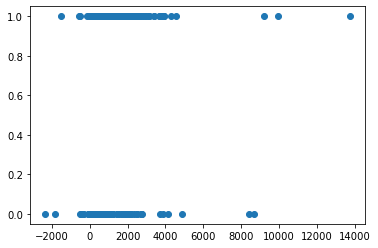

In [69]:
plt.scatter(x,y)